In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import math
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import statsmodels.stats.diagnostic as sm_diag
import statsmodels.api as sm
from sklearn import svm
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix





# Trabajo práctico Integrador
## Materia “Introducción al Aprendizaje Estadístico”
## Diplomatura en Ciencias Sociales Computacionales.
## Universidad Nacional Guillermo Brown - UnaB.
### Objetivo.
### El presente trabajo tiene como finalidad la integración aplicación de las técnicas estudiadas durante la materia como así también la aplicación correcta de los algoritmos.

In [150]:
url = 'https://raw.githubusercontent.com/Marian2057/TP1_Aprendizaje_Estad-stico/main/Buenos_Aires_AIRBNB.csv'
base = pd.read_csv(url)
count_rows = base.shape[0]
count_cols = base.shape[1]

print( "La base tiene {0} filas y {1} columnas".format( count_rows, count_cols ) ) 

base.head(5)


La base tiene 22877 filas y 15 columnas


id                                 name  host_id host_name  \
0   7270  ¡¡Great Loft in Palermo Hollywood!!    18822      Toni   
1  11508   Amazing Luxurious Apt-Palermo Soho    42762   Candela   
2  12463  Room in Recoleta - awesome location    48799      Matt   
3  13095   Standard Room at Palermo Viejo B&B    50994     Ariel   
4  13096   Standard Room in Palermo Viejo B&B    50994     Ariel   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0       Palermo -34.58241  -58.43382  Entire home/apt   2033              20   
1       Palermo -34.58225  -58.42460  Entire home/apt   3588               2   
2      Recoleta -34.59761  -58.39468     Private room   1435               1   
3       Palermo -34.59382  -58.42994     Private room   2691               1   
4       Palermo -34.59398  -58.42853     Private room   2691               1   

   number_of_reviews last_review  reviews_per_month  \
0                 14  30-04-2018               0.15   
1                 25  13-08-2019               0.28   
2                 20  11-12-2017               0.17   
3                  1  18-12-2018               0.09   
4                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
0                               1               363  
1                               1               281  
2                               1               365  
3                               7               360  
4                               7               360

# 1. PARTE I. Estadística descriptiva.

## ¿Qué columnas tiene?

In [151]:
columns = base.columns
columns.tolist()

['id',
 'name',
 'host_id',
 'host_name',
 'neighbourhood',
 'latitude',
 'longitude',
 'room_type',
 'price',
 'minimum_nights',
 'number_of_reviews',
 'last_review',
 'reviews_per_month',
 'calculated_host_listings_count',
 'availability_365']



## ¿Qué tipo de columnas son?

Tenemos 10 variables numericas (3 son flotantes y 7 enteras) y 5 categoricas

In [152]:
print("Variables del dataset \n")
base.info()
base.describe()

Variables del dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22877 entries, 0 to 22876
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22877 non-null  int64  
 1   name                            22867 non-null  object 
 2   host_id                         22877 non-null  int64  
 3   host_name                       22854 non-null  object 
 4   neighbourhood                   22877 non-null  object 
 5   latitude                        22877 non-null  float64
 6   longitude                       22877 non-null  float64
 7   room_type                       22877 non-null  object 
 8   price                           22877 non-null  int64  
 9   minimum_nights                  22877 non-null  int64  
 10  number_of_reviews               22877 non-null  int64  
 11  last_review                     16432 non-null  object 
 12  reviews_

id       host_id      latitude     longitude          price  \
count  2.287700e+04  2.287700e+04  22877.000000  22877.000000   22877.000000   
mean   2.487670e+07  9.739731e+07    -34.592534    -58.416364    3214.630196   
std    1.191191e+07  9.274044e+07      0.018304      0.029937   12364.429880   
min    7.270000e+03  2.616000e+03    -34.688950    -58.530200     120.000000   
25%    1.631899e+07  1.363528e+07    -34.603400    -58.435630    1196.000000   
50%    2.856388e+07  6.212518e+07    -34.591830    -58.415950    1973.000000   
75%    3.454449e+07  1.713546e+08    -34.581970    -58.392220    2990.000000   
max    4.035243e+07  3.118884e+08    -34.532720    -58.354880  597865.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    22877.000000       22877.000000       16432.000000   
mean         5.653233          15.482974           1.266434   
std         21.513176          31.268565           1.440429   
min          1.000000           0.000000           0.010000   
25%          1.000000           0.000000           0.250000   
50%          3.000000           4.000000           0.760000   
75%          4.000000          16.000000           1.810000   
max       1125.000000         600.000000          37.580000   

       calculated_host_listings_count  availability_365  
count                    22877.000000      22877.000000  
mean                         6.296062        202.064912  
std                         14.748998        134.161675  
min                          1.000000          0.000000  
25%                          1.000000         83.000000  
50%                          1.000000        180.000000  
75%                          4.000000        343.000000  
max                        105.000000        365.000000

In [153]:
base["room_type"].unique()

array(['Entire home/apt', 'Private room', 'Shared room', 'Hotel room'],
      dtype=object)

In [154]:
base = pd.concat([
        base.select_dtypes([], ['object']),
        base.select_dtypes(['object']).apply(pd.Series.astype, dtype='category')
        ], axis=1)

base.info()
print("---------")
print( type(base["room_type"]))
print("---------")
base["room_type"].unique()
base["room_type"].unique().codes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22877 entries, 0 to 22876
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              22877 non-null  int64   
 1   host_id                         22877 non-null  int64   
 2   latitude                        22877 non-null  float64 
 3   longitude                       22877 non-null  float64 
 4   price                           22877 non-null  int64   
 5   minimum_nights                  22877 non-null  int64   
 6   number_of_reviews               22877 non-null  int64   
 7   reviews_per_month               16432 non-null  float64 
 8   calculated_host_listings_count  22877 non-null  int64   
 9   availability_365                22877 non-null  int64   
 10  name                            22867 non-null  category
 11  host_name                       22854 non-null  category
 12  neighbourhood     

array([0, 2, 3, 1], dtype=int8)

### Análisis de la variable precio

(array([2.2456e+04, 2.6200e+02, 5.8000e+01, 3.0000e+01, 1.8000e+01,
        9.0000e+00, 4.0000e+00, 9.0000e+00, 3.0000e+00, 4.0000e+00,
        0.0000e+00, 3.0000e+00, 1.0000e+00, 0.0000e+00, 3.0000e+00,
        1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 3.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 5.0000e+00]),
 array([1.200000e+02, 1.207490e+04, 2.402980e+04, 3.598470e+04,
        4.793960e+04, 5.989450e+04, 7.184940e+04, 8.380430e+04,
        9.575920e+04, 1.077141e+05, 1.196690e+05, 1.316239e+05,
        1.435788e+05, 1.555337e+05, 1.674886e+05, 1.794435e+05,
        1.913984e+05, 2.033533e+05, 2.153082e+05, 2.272631e+05

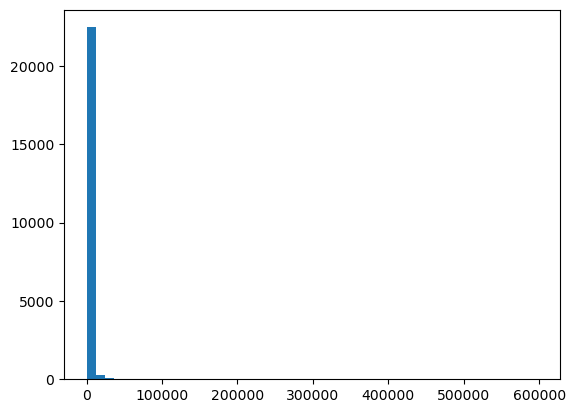

In [155]:
plt.hist( base["price"], bins=50)

Claramente se ve una alineación hacia la izquierda con "outlines" despues de $20.000 que desvirtuan el histograma
Vamos a probar con un límite de la base que mantenga la mayor cantidad de casos sin outlines

In [156]:
precios = pd.Series( base["price"])
mediana_precios = np.median(base["price"])
print( "El precio mínimo es de {0}.".format(  np.min(precios)))
print( "La mediana de precios es de {0}.".format(  mediana_precios))
print( "El precio máximo es de {0}.".format(  np.max(precios)))

#baseReducida = base[["id","neighbourhood","room_type", "price", "room_type", "minimum_nights","number_of_reviews", "last_review","reviews_per_month", "calculated_host_listings_count", "availability_365"  ] ]
#print(data.loc[:, ~data.columns.isin(['name', 'food_id'])])


El precio mínimo es de 120.
La mediana de precios es de 1973.0.
El precio máximo es de 597865.


In [157]:
base['price'].nunique()

340

(22256, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 22256 entries, 0 to 22876
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   price                           22256 non-null  int64   
 1   minimum_nights                  22256 non-null  int64   
 2   number_of_reviews               22256 non-null  int64   
 3   reviews_per_month               16076 non-null  float64 
 4   calculated_host_listings_count  22256 non-null  int64   
 5   availability_365                22256 non-null  int64   
 6   host_name                       22233 non-null  category
 7   neighbourhood                   22256 non-null  category
 8   room_type                       22256 non-null  category
 9   last_review                     16076 non-null  category
dtypes: category(4), float64(1), int64(5)
memory usage: 1.5 MB
None
El % del dataframe original es de 0.9728548323643834
['Entire home/

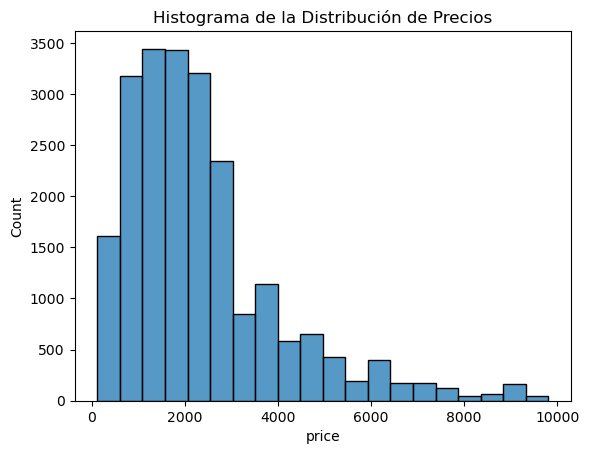

In [265]:
baseReducida = base.loc[:, ~base.columns.isin(['id','host_id', 'latitude','longitude', 'name'])]
baseReducida = baseReducida[baseReducida["price"] < (mediana_precios * 5 ) ]
print( baseReducida.shape )
print( baseReducida.info())
print( "El % del dataframe original es de {0:2}".format(baseReducida.shape[0]/base.shape[0]))
print( baseReducida["room_type"].values  )

# Suponiendo que ya tienes las líneas de código anteriores para definir baseReducida y crear el gráfico
sns.histplot(baseReducida, bins=20, x=baseReducida["price"])
plt.title("Histograma de la Distribución de Precios")

# Agregar cualquier otro ajuste o personalización del gráfico si es necesario
plt.show()

<Axes: xlabel='price', ylabel='Density'>

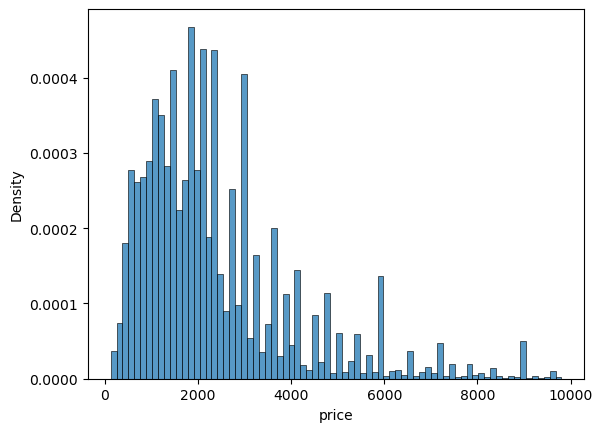

In [159]:
sns.histplot( baseReducida,  x= baseReducida["price"] , stat='density' )

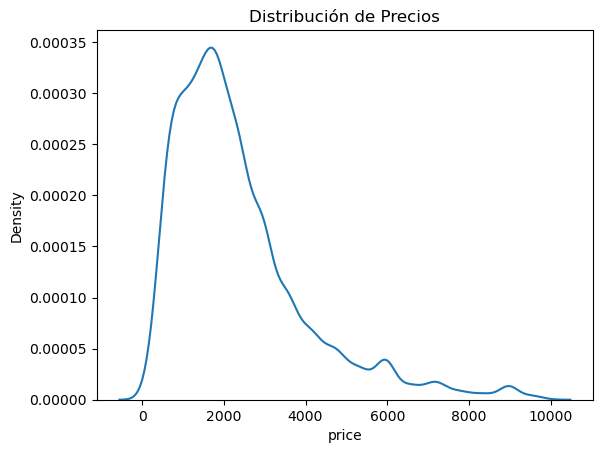

In [264]:
# Suponiendo que ya tienes las líneas de código anteriores para definir baseReducida y crear el gráfico
sns.kdeplot(baseReducida, x=baseReducida["price"])
plt.title("Distribución de Precios")

# Agregar cualquier otro ajuste o personalización del gráfico si es necesario
plt.show()

### Análisis de la variable "barrios"

In [161]:
#Veamos la variable neighbourhood
barrios_distintos = base['neighbourhood'].unique()
pd.Series( barrios_distintos).sort_values(ascending = True)

39            Agronomia
14              Almagro
4             Balvanera
21             Barracas
5              Belgrano
25                 Boca
16                Boedo
17            Caballito
10            Chacarita
23              Coghlan
15           Colegiales
8          Constitucion
28               Flores
33             Floresta
42              Liniers
37            Mataderos
2             Monserrat
29         Monte Castro
19        Nueva Pompeya
3                 Nuñez
0               Palermo
40    Parque Avellaneda
20     Parque Chacabuco
32          Parque Chas
24     Parque Patricios
34             Paternal
9         Puerto Madero
1              Recoleta
12               Retiro
26             Saavedra
13        San Cristobal
6           San Nicolas
7             San Telmo
30      Velez Sarsfield
36            Versalles
11         Villa Crespo
35     Villa Del Parque
27         Villa Devoto
31    Villa Gral. Mitre
43         Villa Lugano
41           Villa Luro
18        Villa 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


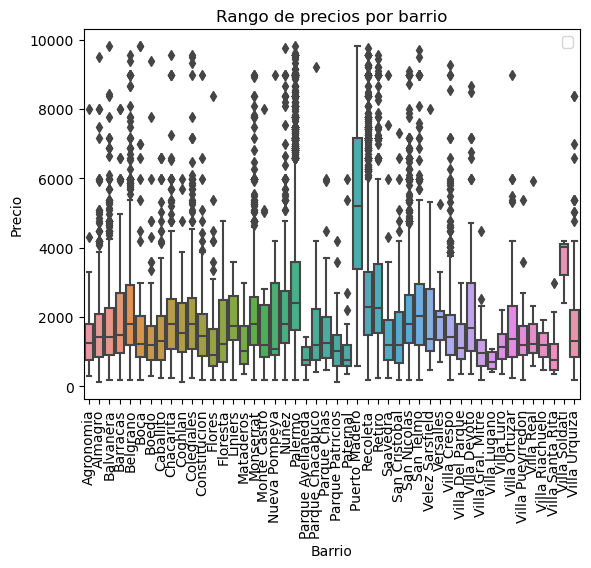

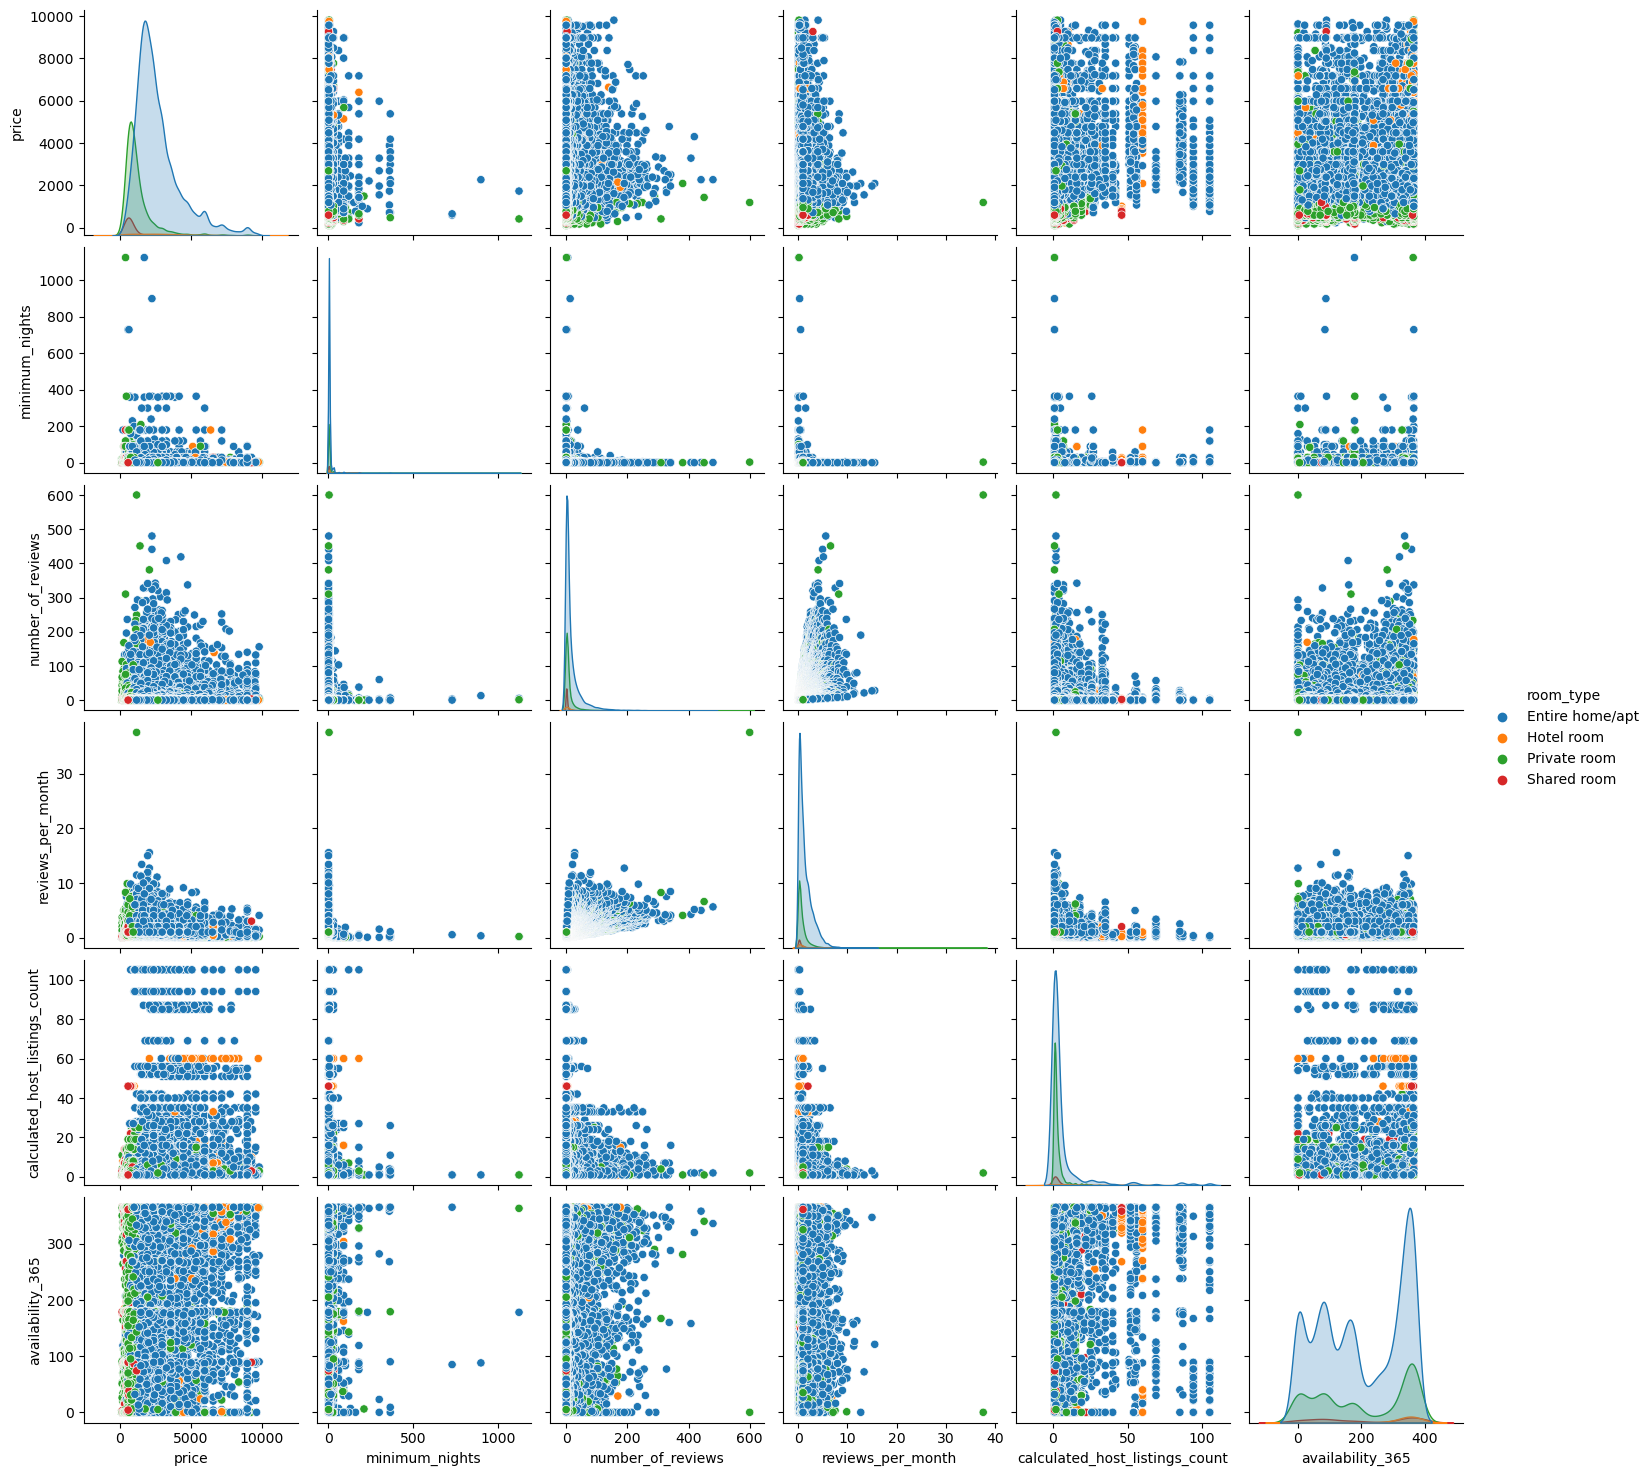

In [162]:
ax = sns.boxplot(data=baseReducida, x=baseReducida["neighbourhood"], y=baseReducida["price"])
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel("Barrio")
plt.ylabel("Precio")
plt.title("Rango de precios por barrio")
plt.legend()
plt.show()

sns.pairplot(baseReducida, hue = 'room_type')
#grid = sns.PairGrid( baseReducida)
#grid.map_diag( sns.histplot)
#grid.map_offdiag( sns.sca) 

In [163]:
# Agrupar los datos por barrio y calcular las estadísticas descriptivas
stats_table = baseReducida.groupby("neighbourhood")["price"].agg(["min", "max", "median", "mean", "std"])

# Imprimir la tabla de estadísticas descriptivas
print(stats_table)

                    min   max  median         mean          std
neighbourhood                                                  
Agronomia           299  8012  1255.5  1584.527778  1419.945643
Almagro             120  9507  1435.0  1630.258299  1065.092019
Balvanera           179  9806  1435.0  1729.307339  1214.896916
Barracas            179  8012  1495.0  1958.372781  1465.784126
Belgrano            179  9567  1794.0  2211.359804  1512.183867
Boca                179  9806  1226.0  1751.728814  1664.027981
Boedo               299  9387  1196.0  1491.053571  1377.096782
Caballito           239  6577  1315.0  1570.258850  1045.271007
Chacarita           239  9567  1794.0  2074.073986  1460.576045
Coghlan             120  5979  1555.0  1814.296703  1191.866710
Colegiales          239  9567  1794.0  2104.368889  1478.986635
Constitucion        179  8969  1465.0  1593.856707  1035.386276
Flores              179  8371   897.0  1266.981982  1180.142688
Floresta            179  4783  1226.0  1

##  a) Análisis y aplicación de Medidas de Tendencia Central

Estos datos proporcionan un resumen de las frecuencias y las categorías más comunes en cada una de las columnas categóricas del conjunto de datos.

neighbourhood: Hay un total de 22,877 registros en la columna 'neighbourhood'. Hay 48 valores únicos en esta columna, lo que indica que hay 48 barrios diferentes. El barrio más común es "Palermo", que aparece 6,934 veces.

room_type: Hay un total de 22,877 registros en la columna 'room_type'. Hay 4 valores únicos en esta columna, lo que indica que hay 4 tipos de habitaciones diferentes. El tipo de habitación más común es "Entire home/apt" (departamento completo), que aparece 17,389 veces.


In [164]:
# Crear un DataFrame con los datos solicitados
data = {
    'User': ['count', 'unique', 'top', 'freq'],
    'name': [len(base['name']), base['name'].nunique(), base['name'].mode()[0], base['name'].value_counts().max()],
    'host_name': [len(base['host_name']), base['host_name'].nunique(), base['host_name'].mode()[0], base['host_name'].value_counts().max()],
    'neighbourhood': [len(base['neighbourhood']), base['neighbourhood'].nunique(), base['neighbourhood'].mode()[0], base['neighbourhood'].value_counts().max()],
    'room_type': [len(base['room_type']), base['room_type'].nunique(), base['room_type'].mode()[0], base['room_type'].value_counts().max()],
    'last_review': [len(base['last_review']), base['last_review'].nunique(), base['last_review'].mode()[0], base['last_review'].value_counts().max()]
}

user_data = pd.DataFrame(data)
print(user_data)

     User                      name host_name neighbourhood        room_type  \
0   count                     22877     22877         22877            22877   
1  unique                     22129      3706            48                4   
2     top  Departamento en Recoleta     Maria       Palermo  Entire home/apt   
3    freq                        26       343          6934            17389   

  last_review  
0       22877  
1        1326  
2  18-11-2019  
3         654  


En el siguiente análisis se muestra un resumen de las variables numéricas de la base de datos. 
Estos datos resaltan la diversidad en precios, requisitos de estancia mínima, revisiones recibidas, número de alojamientos por anfitrión y disponibilidad en el conjunto de datos. Esto puede ser útil para comprender las características de los alojamientos y tomar decisiones informadas al buscar una opción de hospedaje.

In [165]:
#Analisis de variables numericas
base.describe()

id       host_id      latitude     longitude          price  \
count  2.287700e+04  2.287700e+04  22877.000000  22877.000000   22877.000000   
mean   2.487670e+07  9.739731e+07    -34.592534    -58.416364    3214.630196   
std    1.191191e+07  9.274044e+07      0.018304      0.029937   12364.429880   
min    7.270000e+03  2.616000e+03    -34.688950    -58.530200     120.000000   
25%    1.631899e+07  1.363528e+07    -34.603400    -58.435630    1196.000000   
50%    2.856388e+07  6.212518e+07    -34.591830    -58.415950    1973.000000   
75%    3.454449e+07  1.713546e+08    -34.581970    -58.392220    2990.000000   
max    4.035243e+07  3.118884e+08    -34.532720    -58.354880  597865.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    22877.000000       22877.000000       16432.000000   
mean         5.653233          15.482974           1.266434   
std         21.513176          31.268565           1.440429   
min          1.000000           0.000000           0.010000   
25%          1.000000           0.000000           0.250000   
50%          3.000000           4.000000           0.760000   
75%          4.000000          16.000000           1.810000   
max       1125.000000         600.000000          37.580000   

       calculated_host_listings_count  availability_365  
count                    22877.000000      22877.000000  
mean                         6.296062        202.064912  
std                         14.748998        134.161675  
min                          1.000000          0.000000  
25%                          1.000000         83.000000  
50%                          1.000000        180.000000  
75%                          4.000000        343.000000  
max                        105.000000        365.000000

Segun el análisis de las variables numéricas en el conjunto de datos. Los resultados muestran que el precio promedio de los alojamientos es de aproximadamente 3.214,63, con un rango que va desde 120 hasta 597.865. En cuanto al mínimo de noches, se observa un valor promedio de aproximadamente 5,65 noches, variando desde 1 noche hasta 1.125 noches.

En cuanto a las revisiones de los alojamientos, se encontró un promedio de 15.48 reviews por mes, con un rango que va desde 0 hasta 600 reviews. Esto indica un nivel significativo de participación y retroalimentación por parte de los huéspedes.

En cuanto a la disponibilidad de los alojamientos a lo largo del año, se observa un promedio de aproximadamente 202,06 días disponibles, con un rango que va desde 0 hasta 365 días. Esto indica una oferta relativamente amplia de alojamientos en la plataforma.

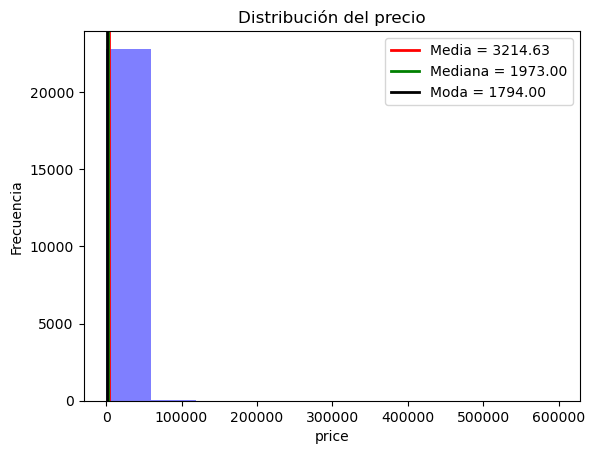

In [166]:
#Sin embargo, al tratarse de una variable cuantitativa, lo mejor es visualizarla con un histograma.

# Cálculo de estadísticas descriptivas
media_price = np.mean(base["price"])
mediana_price = np.median(base["price"])
min_price = np.min(base["price"])
max_price = np.max(base["price"])
rango_price = max_price - min_price
std_price = np.std(base["price"])
moda_price = base["price"].mode()[0]

# Armamos el gráfico
plt.hist(base["price"], color='blue', alpha=0.5)
plt.xlabel("price")
plt.ylabel("Frecuencia")
plt.title("Distribución del precio")
plt.axvline(media_price, color='red', linewidth=2, label=f'Media = {media_price:.2f}')
plt.axvline(mediana_price, color='green', linewidth=2, label=f'Mediana = {mediana_price:.2f}')
plt.axvline(moda_price, color='black', linewidth=2, label=f'Moda = {moda_price:.2f}')

plt.legend()
plt.show()

podemos observar que la media es de 3214.63, lo que indica un valor promedio relativamente alto. La moda es de 1794, lo que sugiere que este valor es el más frecuente en la distribución. La mediana, que es de 1973.0, indica que la mitad de los precios se encuentran por encima de este valor y la otra mitad por debajo de él.

En el histograma, podemos apreciar una curtosis asimétrica hacia la derecha, lo que indica que hay una concentración de valores más bajos en la cola derecha de la distribución. La mayoría de los registros muestran precios que se agrupan alrededor del rango de 0 a 50000, lo que indica una tendencia a concentrarse en esa franja de precios.

In [167]:
media = base['price'].mean()
moda = base['price'].mode()[0]
mediana = base['price'].median()

print("Media:", media)
print("Moda:", moda)
print("Mediana:", mediana)


Media: 3214.630196266993
Moda: 1794
Mediana: 1973.0


In [168]:
print(f"La cantidad mínima de precio es: {min_price}")
print(f"La cantidad máxima de precio es: {max_price}")
print(f"El rango de precio es: {rango_price}")
print(f"El error standard de precio es: {std_price:.4f}")

La cantidad mínima de precio es: 120
La cantidad máxima de precio es: 597865
El rango de precio es: 597745
El error standard de precio es: 12364.1596


In [169]:
# Calcula la varianza de todas las columnas
variance = base.var()

print(variance)

id                                1.418935e+14
host_id                           8.600790e+15
latitude                          3.350545e-04
longitude                         8.962125e-04
price                             1.528791e+08
minimum_nights                    4.628168e+02
number_of_reviews                 9.777231e+02
reviews_per_month                 2.074837e+00
calculated_host_listings_count    2.175330e+02
availability_365                  1.799936e+04
dtype: float64


C:\Users\pim\AppData\Local\Temp\ipykernel_10200\2463464367.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  variance = base.var()


## Curtosis


In [170]:
#Importamos la librería.
from scipy.stats import kurtosis

#Generamos un nuevo conjunto filtrado sin los valores nulos
base_nueva = base[base['price']>=1]
#base_nueva = base_nueva[:100]

#Aplicamos el método
kurtosis(base_nueva['price'])

1442.6202036326044

## b)	Análisis y aplicación de Medidas de Dispersión.

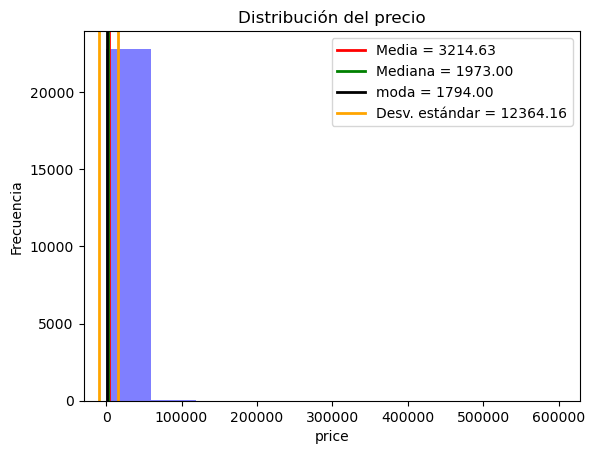

Desviación estándar: 12364.15963950588
Varianza: 152872443.59118617
Rango intercuartil: 1794.0
Coeficiente de variación: 384.621523616117


In [171]:
# Calculamos las medidas de dispersión
std_price = np.std(base["price"])
var_price = np.var(base["price"])
iqr_price = np.subtract(np.percentile(base["price"], 75), np.percentile(base["price"], 25))
cv_price = (std_price / media_price) * 100

# Armamos el gráfico
plt.hist(base["price"], color='blue', alpha=0.5)
plt.xlabel("price")
plt.ylabel("Frecuencia")
plt.title("Distribución del precio")
plt.axvline(media_price, color='red', linewidth=2, label=f'Media = {media_price:.2f}')
plt.axvline(mediana_price, color='green', linewidth=2, label=f'Mediana = {mediana_price:.2f}')
plt.axvline(moda_price, color='black', linewidth=2, label=f'moda = {moda_price:.2f}')
plt.axvline(media_price + std_price, color='orange', linewidth=2, label=f'Desv. estándar = {std_price:.2f}')
plt.axvline(media_price - std_price, color='orange', linewidth=2)
plt.legend()
plt.show()

# Imprimimos las medidas de dispersión
print("Desviación estándar:", std_price)
print("Varianza:", var_price)
print("Rango intercuartil:", iqr_price)
print("Coeficiente de variación:", cv_price)

## c)	Análisis de covarianza entre las variables.

In [172]:
#Para medir la covarianza entre dos variables, podemos utilizar el método de COV de Numpy

#Seleccionamos una muestra de esas variables
variable_1 = np.array([1,2,3,4,5,6])

#Seleccionamos una muestra de esas variables.
variable_2 = np.array([2,3,4,5,7,8])

#Aplicamos el método
covarianza = np.cov(variable_1,variable_2)

covarianza

array([[3.5       , 4.3       ],
       [4.3       , 5.36666667]])

In [173]:
#Miremos la matriz que generó
covarianza[0][0]

3.5

In [174]:
base_numerica = base[['price', 'latitude', 'number_of_reviews','reviews_per_month', 'longitude', 'calculated_host_listings_count', 'availability_365', 'minimum_nights']]
base_numerica

price  latitude  number_of_reviews  reviews_per_month  longitude  \
0       2033 -34.58241                 14               0.15  -58.43382   
1       3588 -34.58225                 25               0.28  -58.42460   
2       1435 -34.59761                 20               0.17  -58.39468   
3       2691 -34.59382                  1               0.09  -58.42994   
4       2691 -34.59398                  0                NaN  -58.42853   
...      ...       ...                ...                ...        ...   
22872   1495 -34.63427                  0                NaN  -58.40749   
22873   1196 -34.56871                  0                NaN  -58.50318   
22874   2691 -34.58464                  0                NaN  -58.43219   
22875   1375 -34.59070                  0                NaN  -58.42208   
22876   1196 -34.61385                  0                NaN  -58.46594   

       calculated_host_listings_count  availability_365  minimum_nights  
0                                   1               363              20  
1                                   1               281               2  
2                                   1               365               1  
3                                   7               360               1  
4                                   7               360               1  
...                               ...               ...             ...  
22872                               1               178               1  
22873                               1               143               1  
22874                               2                 5               1  
22875                               1               152               3  
22876                               1               333               2  

[22877 rows x 8 columns]

In [175]:
matriz_base = base_numerica.corr()
matriz_base

price  latitude  number_of_reviews  \
price                           1.000000  0.004820          -0.015942   
latitude                        0.004820  1.000000           0.011173   
number_of_reviews              -0.015942  0.011173           1.000000   
reviews_per_month              -0.018156  0.023128           0.492807   
longitude                       0.031902 -0.529895           0.069840   
calculated_host_listings_count  0.022110  0.023686          -0.055618   
availability_365                0.038567 -0.027703           0.049511   
minimum_nights                  0.019407  0.020927          -0.060095   

                                reviews_per_month  longitude  \
price                                   -0.018156   0.031902   
latitude                                 0.023128  -0.529895   
number_of_reviews                        0.492807   0.069840   
reviews_per_month                        1.000000   0.061384   
longitude                                0.061384   1.000000   
calculated_host_listings_count          -0.096225   0.055916   
availability_365                        -0.074320   0.061144   
minimum_nights                          -0.074952  -0.026795   

                                calculated_host_listings_count  \
price                                                 0.022110   
latitude                                              0.023686   
number_of_reviews                                    -0.055618   
reviews_per_month                                    -0.096225   
longitude                                             0.055916   
calculated_host_listings_count                        1.000000   
availability_365                                      0.091626   
minimum_nights                                        0.018651   

                                availability_365  minimum_nights  
price                                   0.038567        0.019407  
latitude                               -0.027703        0.020927  
number_of_reviews                       0.049511       -0.060095  
reviews_per_month                      -0.074320       -0.074952  
longitude                               0.061144       -0.026795  
calculated_host_listings_count          0.091626        0.018651  
availability_365                        1.000000        0.038050  
minimum_nights                          0.038050        1.000000

In [176]:
# Crear un DataFrame con las variables de interés
data = {
    'price': baseReducida['price'],
    'minimum_nights': baseReducida['minimum_nights'],
    'number_of_reviews': baseReducida['number_of_reviews'],
    'reviews_per_month': baseReducida['reviews_per_month'],
    'calculated_host_listings_count': baseReducida['calculated_host_listings_count'],
    'availability_365': baseReducida['availability_365']
}

df = pd.DataFrame(data)

# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Obtener la correlación de cada variable con "price"
price_correlation = correlation_matrix['price']

print(price_correlation)

price                             1.000000
minimum_nights                   -0.014936
number_of_reviews                 0.027278
reviews_per_month                -0.039310
calculated_host_listings_count    0.180251
availability_365                  0.122842
Name: price, dtype: float64


La variable "minimum_nights" tiene una correlación positiva muy baja con el precio (0.019407). Esto indica que un aumento en el número mínimo de noches generalmente tiene una influencia mínima en el precio.

La variable "number_of_reviews" tiene una correlación negativa muy baja con el precio (-0.015942). Esto sugiere que la cantidad de reseñas no tiene una relación fuerte con el precio.

La variable "reviews_per_month" también tiene una correlación negativa muy baja con el precio (-0.018156). Esto implica que la tasa de reseñas por mes tiene una influencia mínima en el precio.

La variable "calculated_host_listings_count" muestra una correlación positiva baja con el precio (0.022110). Esto sugiere que un mayor número de anuncios calculados por el host puede tener una ligera influencia en el precio.

La variable "availability_365" tiene una correlación positiva baja con el precio (0.038567). Esto indica que una mayor disponibilidad durante todo el año podría tener una influencia ligeramente positiva en el precio.

En general, basándonos en estos coeficientes de correlación, ninguna de las variables tiene una relación fuerte con el precio. Sin embargo, las variables "calculated_host_listings_count" y "availability_365" parecen tener una correlación ligeramente más alta en comparación con las demás. 

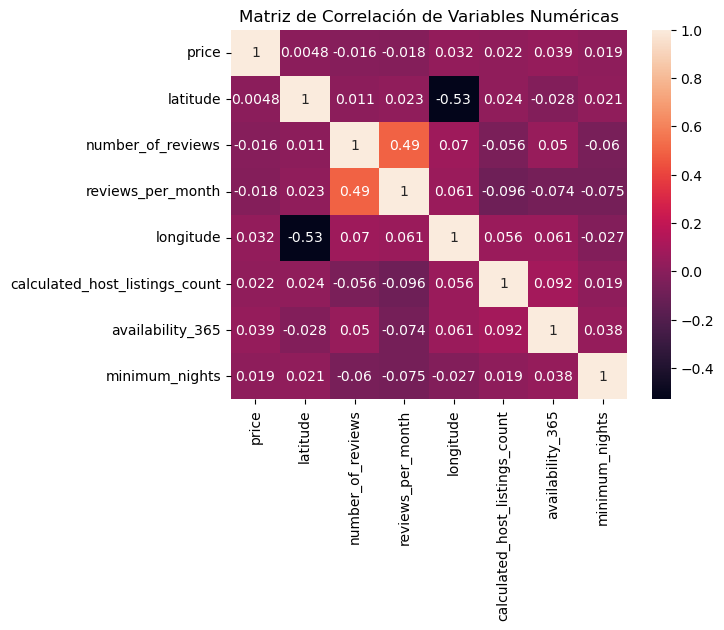

In [273]:
# Suponiendo que ya tienes las líneas de código anteriores para definir base_numerica y crear el gráfico
sns.heatmap(base_numerica.corr(), annot=True)
plt.title("Matriz de Correlación de Variables Numéricas")

# Agregar cualquier otro ajuste o personalización del gráfico si es necesario
plt.show()

In [178]:
import numpy as np

x = np.nan_to_num(base['availability_365'])
y = np.nan_to_num(base['price'])

covariance = np.cov(x, y)[0][1]
print("La covarianza es:", covariance)

La covarianza es: 63975.397716320316


La covarianza  de 63975.39 es positiva y nos indica que hay una relación directa entre estas dos variables, lo cual significa que a medida que el minimo de noches aumenta, también tiende a aumentar el precio. Sin embargo, hay que tener en cuenta que la covarianza no proporciona una medida normalizada de la fuerza de la relación entre las variables.
Es importante tener en cuenta que la covarianza puede estar influenciada por las escalas y las unidades de las variables, lo que dificulta la interpretación directa de su magnitud. Para tener una medida más estandarizada de la fuerza de la relación, se utiliza el coeficiente de correlación.

El coeficiente de correlación, a diferencia de la covarianza, está normalizado y varía entre -1 y 1. Un valor de 1 indica una correlación positiva perfecta, -1 indica una correlación negativa perfecta y 0 indica ausencia de correlación. Para obtener una medida más precisa de la relación entre las variables, calculamos el coeficiente de correlación entre "minimum_nights" y "price".

In [179]:
#Apliquemos sobre nuestro dataframe
x = base['minimum_nights']
y = base['price']

np.cov(x,y)[0][1]


#La podemos calcular con Numpy.
r = np.corrcoef(x,y)

#Miro la matriz de correlación
print("La matriz de correlación entre el minimo de noches y el precio es:\n", r)

La matriz de correlación entre el minimo de noches y el precio es:
 [[1.         0.01940694]
 [0.01940694 1.        ]]


In [180]:
#Apliquemos sobre nuestro dataframe
x = base['availability_365']
y = base['price']

np.cov(x,y)[0][1]


#La podemos calcular con Numpy.
r = np.corrcoef(x,y)

#Miro la matriz de correlación
print("La matriz de correlación entre la disponibilidad anual y el precio es:\n", r)

La matriz de correlación entre la disponibilidad anual y el precio es:
 [[1.         0.03856652]
 [0.03856652 1.        ]]


La correlación entre "availability_365" y "price" (0.0386) es ligeramente mayor que la correlación entre "minimum_nights" y "price" (0.0194). Sin embargo, ambas correlaciones son bastante bajas, lo que sugiere que la relación entre estas variables y el precio es débil.

In [181]:
#Apliquemos nuestros métodos.
np.corrcoef(x,y)[0][1]

0.038566517663953435

In [182]:
#Me quedo solamente con los datos de correlación
round(r[0][1],3)

0.039

La matriz de correlación es simétrica, por lo que el valor en la posición (0, 1) es el mismo que en la posición (1, 0), en este caso es aproximadamente 0.038566517663953435. Este valor indica una correlación muy débil y cercana a cero entre las dos variables.

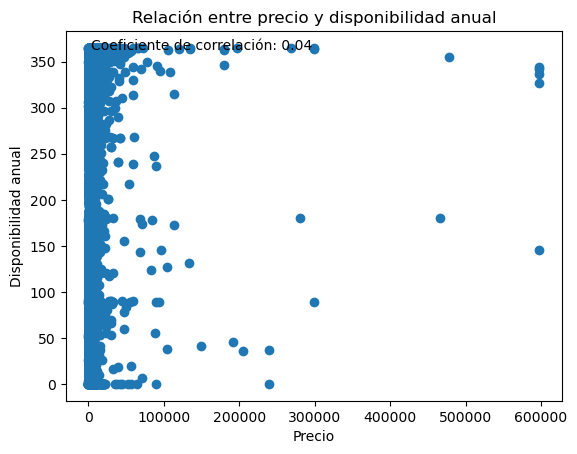

In [183]:
# Calcular el coeficiente de correlación
corr = np.corrcoef(base['price'], base['availability_365'])[0, 1]

# Crear el gráfico de dispersión
plt.scatter(base['price'], base['availability_365'])

# Añadir título y etiquetas a los ejes
plt.title('Relación entre precio y disponibilidad anual')
plt.xlabel('Precio')
plt.ylabel('Disponibilidad anual')

# Mostrar el coeficiente de correlación en el gráfico
plt.text(0.05, 0.95, f'Coeficiente de correlación: {corr:.2f}', transform=plt.gca().transAxes)

# Mostrar el gráfico
plt.show()

In [184]:
round(base.agg(['mean','median','std', 'var']),2)

C:\Users\pim\AppData\Local\Temp\ipykernel_10200\741023292.py:1: FutureWarning: ['name', 'host_name', 'neighbourhood', 'room_type', 'last_review'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  round(base.agg(['mean','median','std', 'var']),2)


id       host_id  latitude  longitude         price  \
mean    2.487670e+07  9.739731e+07    -34.59     -58.42  3.214630e+03   
median  2.856388e+07  6.212518e+07    -34.59     -58.42  1.973000e+03   
std     1.191191e+07  9.274044e+07      0.02       0.03  1.236443e+04   
var     1.418935e+14  8.600790e+15      0.00       0.00  1.528791e+08   

        minimum_nights  number_of_reviews  reviews_per_month  \
mean              5.65              15.48               1.27   
median            3.00               4.00               0.76   
std              21.51              31.27               1.44   
var             462.82             977.72               2.07   

        calculated_host_listings_count  availability_365  
mean                              6.30            202.06  
median                            1.00            180.00  
std                              14.75            134.16  
var                             217.53          17999.36

# 2.	PARTE II. Modelado supervisado.

        Se les solicita generar dos modelos de aprendizaje supervisado.

### a. Entrenar y evaluar el modelo de predicción de precio:

Creación y entrenamiento del modelo de predicción de precios:

In [185]:
#Importamos el módulo que necesitamos
import statsmodels.formula.api as smf

#Construimos el modelo.
lm = smf.ols(formula='price ~ minimum_nights + number_of_reviews + availability_365+ calculated_host_listings_count', data=baseReducida).fit()

In [186]:
#Ahora podemos consultar nuestra B0 y B1
lm.params

Intercept                         1971.327113
minimum_nights                      -1.599482
number_of_reviews                    1.613809
availability_365                     1.323198
calculated_host_listings_count      19.565350
dtype: float64

In [187]:
#Le puedo preguntar los P-valores de ambos parámetros, y vemo que son infinitamente pequeños.
lm.pvalues

Intercept                          0.000000e+00
minimum_nights                     1.836011e-03
number_of_reviews                  3.665512e-06
availability_365                   1.266887e-58
calculated_host_listings_count    1.445556e-149
dtype: float64

In [188]:
lm.rsquared

0.045419166011987255

In [189]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     264.7
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          1.29e-222
Time:                        17:18:49   Log-Likelihood:            -1.9614e+05
No. Observations:               22256   AIC:                         3.923e+05
Df Residuals:                   22251   BIC:                         3.923e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [190]:
residuals = lm.resid
weights = 1 / np.sqrt(np.abs(residuals))

variables = pd.concat([baseReducida['number_of_reviews'], baseReducida['calculated_host_listings_count'],baseReducida['minimum_nights']], axis=1)
variables = sm.add_constant(variables)

weighted_lm = sm.WLS(baseReducida['price'], variables, weights=weights)
results = weighted_lm.fit()
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.064
Model:                            WLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     504.4
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          3.81e-317
Time:                        17:18:49   Log-Likelihood:            -1.8965e+05
No. Observations:               22256   AIC:                         3.793e+05
Df Residuals:                   22252   BIC:                         3.793e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

En este caso, el R-cuadrado es 0.064, lo que indica que aproximadamente el 6.4% de la variabilidad en el precio puede ser explicada por la variable calculated_host_listings_count, minimum_nights y numberos de reviews. En otras palabras, el modelo de regresión ponderada con las variables calculated_host_listings_count, minimum_nights y numberos de reviews se puede explicar solo una pequeña proporción de la variabilidad en el precio.

Ahora quiero ver si se se cumple el supuesto de los errores con respecto a la homocedasticidad.

In [191]:
import statsmodels.stats.diagnostic as sm_diag

# Obtener los residuos del modelo
residuals = lm.resid

# Realizar la prueba de Breusch-Pagan
bp_test = sm_diag.het_breuschpagan(residuals, exog_het=lm.model.exog)

# Imprimir los resultados de la prueba
print("Estadístico de la prueba:", bp_test[0])
print("Valor p de la prueba:", bp_test[1])
print("Valor crítico de la prueba:", bp_test[3])

Estadístico de la prueba: 128.32261601209305
Valor p de la prueba: 8.893808514189698e-27
Valor crítico de la prueba: 7.49253352600262e-27


Dado que el valor p es menor que un nivel de significancia típico (como 0.05), podemos rechazar la hipótesis nula de homocedasticidad. Esto sugiere que los errores del modelo no tienen una varianza constante, lo que indica la presencia de heterocedasticidad en los datos. Debemos corregirlo.

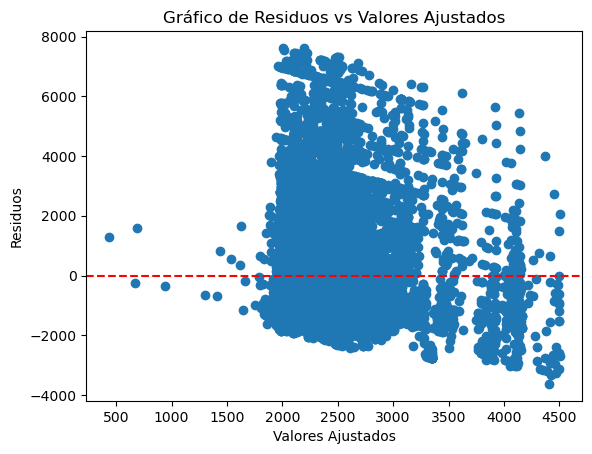

In [192]:
# Obtener los residuos del modelo
residuals = lm.resid

# Obtener los valores ajustados del modelo
fitted_values = lm.fittedvalues

# Gráfico de dispersión de residuos vs valores ajustados
plt.scatter(x=fitted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos vs Valores Ajustados')
plt.show()

En este caso, el valor p de la prueba (0.02968913712431639) es menor que el nivel de significancia comúnmente utilizado (0.05), lo que sugiere que hay evidencia suficiente para rechazar la hipótesis nula y afirmar que existe una relación significativa entre las variables en el modelo de regresión ponderada.

In [193]:
# Obtener los coeficientes del modelo WLS
bo_wls = results.params['const']
b1_wls = results.params['number_of_reviews']
b2_wls = results.params['calculated_host_listings_count']
b3_wls = results.params['minimum_nights']


# Agregar una columna con los valores predichos al DataFrame original
baseReducida['Precio Prediccion'] = bo_wls + b1_wls * baseReducida['number_of_reviews']+ b2_wls * baseReducida['calculated_host_listings_count']+ b3_wls * baseReducida['minimum_nights']
# Mostrar las primeras filas del DataFrame con los valores predichos
print(baseReducida[['number_of_reviews','calculated_host_listings_count','minimum_nights','neighbourhood','price', 'Precio Prediccion']])

       number_of_reviews  calculated_host_listings_count  minimum_nights  \
0                     14                               1              20   
1                     25                               1               2   
2                     20                               1               1   
3                      1                               7               1   
4                      0                               7               1   
...                  ...                             ...             ...   
22872                  0                               1               1   
22873                  0                               1               1   
22874                  0                               2               1   
22875                  0                               1               3   
22876                  0                               1               2   

           neighbourhood  price  Precio Prediccion  
0                Palermo   2033   

In [194]:
bo_wls = results.params['const']
b1_wls = results.params['number_of_reviews']
b2_wls = results.params['calculated_host_listings_count']


# Agregar una columna con los valores predichos al DataFrame original
baseReducida['Precio Prediccion'] = bo_wls + b1_wls * baseReducida['number_of_reviews']+ b2_wls * baseReducida['calculated_host_listings_count']
# Mostrar las primeras filas del DataFrame con los valores predichos
print(baseReducida[['number_of_reviews','calculated_host_listings_count','neighbourhood','price', 'Precio Prediccion']])

       number_of_reviews  calculated_host_listings_count      neighbourhood  \
0                     14                               1            Palermo   
1                     25                               1            Palermo   
2                     20                               1           Recoleta   
3                      1                               7            Palermo   
4                      0                               7            Palermo   
...                  ...                             ...                ...   
22872                  0                               1   Parque Patricios   
22873                  0                               1      Villa Urquiza   
22874                  0                               2            Palermo   
22875                  0                               1            Palermo   
22876                  0                               1  Villa Gral. Mitre   

       price  Precio Prediccion  
0       2033     

In [195]:
bo_wls = results.params['const']
b1_wls = results.params['calculated_host_listings_count']



# Agregar una columna con los valores predichos al DataFrame original
baseReducida['Precio Prediccion'] = bo_wls + b1_wls * baseReducida['calculated_host_listings_count']
# Mostrar las primeras filas del DataFrame con los valores predichos
print(baseReducida[['calculated_host_listings_count','neighbourhood','price', 'Precio Prediccion']])

       calculated_host_listings_count      neighbourhood  price  \
0                                   1            Palermo   2033   
1                                   1            Palermo   3588   
2                                   1           Recoleta   1435   
3                                   7            Palermo   2691   
4                                   7            Palermo   2691   
...                               ...                ...    ...   
22872                               1   Parque Patricios   1495   
22873                               1      Villa Urquiza   1196   
22874                               2            Palermo   2691   
22875                               1            Palermo   1375   
22876                               1  Villa Gral. Mitre   1196   

       Precio Prediccion  
0            2120.099647  
1            2120.099647  
2            2120.099647  
3            2244.293199  
4            2244.293199  
...                  ...  
22872 

In [196]:
#Puedo calcular la suma de los cuadrados de las diferencias
ssd = sum((baseReducida['price']- baseReducida['Precio Prediccion'])**2)

In [197]:
#En el caso que vea cuanto da es
ssd

60144571592.28848

In [198]:
#RSE
rse = np.sqrt(ssd/len(baseReducida)-2-1)

rse

1643.8963095574445

In [199]:
#Veamos el error
error = rse / baseReducida['price'].mean()

#Error
print("El error de la prueba:", error)

El error de la prueba: 0.6922552686173077


El resultado obtenido es 0.7079713680522782. Este valor representa el cociente entre el error estándar de la estimación y el promedio de los valores reales. Un error más bajo indica que las predicciones del modelo tienen menos dispersión con respecto a los valores reales, lo que implica un mejor ajuste del modelo.

In [200]:
# Carga los datos en un DataFrame

# Modelo para predecir el precio
X_price = baseReducida[['number_of_reviews','calculated_host_listings_count']]
y_price = baseReducida['price']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model_price = LinearRegression()
model_price.fit(X_train_price, y_train_price)

# Realizar predicciones en el conjunto de prueba
y_pred_price = model_price.predict(X_test_price)

# Evaluar el modelo de regresión lineal
mse_price = mean_squared_error(y_test_price, y_pred_price)
r2_price = r2_score(y_test_price, y_pred_price)

print("Modelo para predecir el precio:")
print("MSE:", mse_price)
print("R²:", r2_price)


Modelo para predecir el precio:
MSE: 2587923.9020174453
R²: 0.036620465873922425


Según los resultados, el modelo tiene un error cuadrático medio (MSE) de aproximadamente 2567123.5703770304 y un coeficiente de determinación (R²) de aproximadamente 0.0044.

Esto indica que el modelo no se ajusta bien a los datos y no puede explicar una gran parte de la variabilidad en los precios. El MSE alto sugiere que las predicciones del modelo tienen una gran discrepancia con los valores reales de los precios.

In [201]:
# Carga los datos en un DataFrame

# Modelo para predecir el precio
X_price = baseReducida[['calculated_host_listings_count']]
y_price = baseReducida['price']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model_price = LinearRegression()
model_price.fit(X_train_price, y_train_price)

# Realizar predicciones en el conjunto de prueba
y_pred_price = model_price.predict(X_test_price)

# Evaluar el modelo de regresión lineal
mse_price = mean_squared_error(y_test_price, y_pred_price)
r2_price = r2_score(y_test_price, y_pred_price)

print("Modelo para predecir el precio:")
print("MSE:", mse_price)
print("R²:", r2_price)

Modelo para predecir el precio:
MSE: 2591317.8337950627
R²: 0.03535704216496871


Estos resultados indican que el modelo de regresión lineal ajustado no tiene un buen ajuste y no puede predecir de manera efectiva el precio. El MSE alto y el R² muy bajo sugieren que las predicciones del modelo se alejan en gran medida de los valores reales y que el modelo no puede explicar gran parte de la variabilidad en el precio.

<Axes: xlabel='number_of_reviews', ylabel='price'>

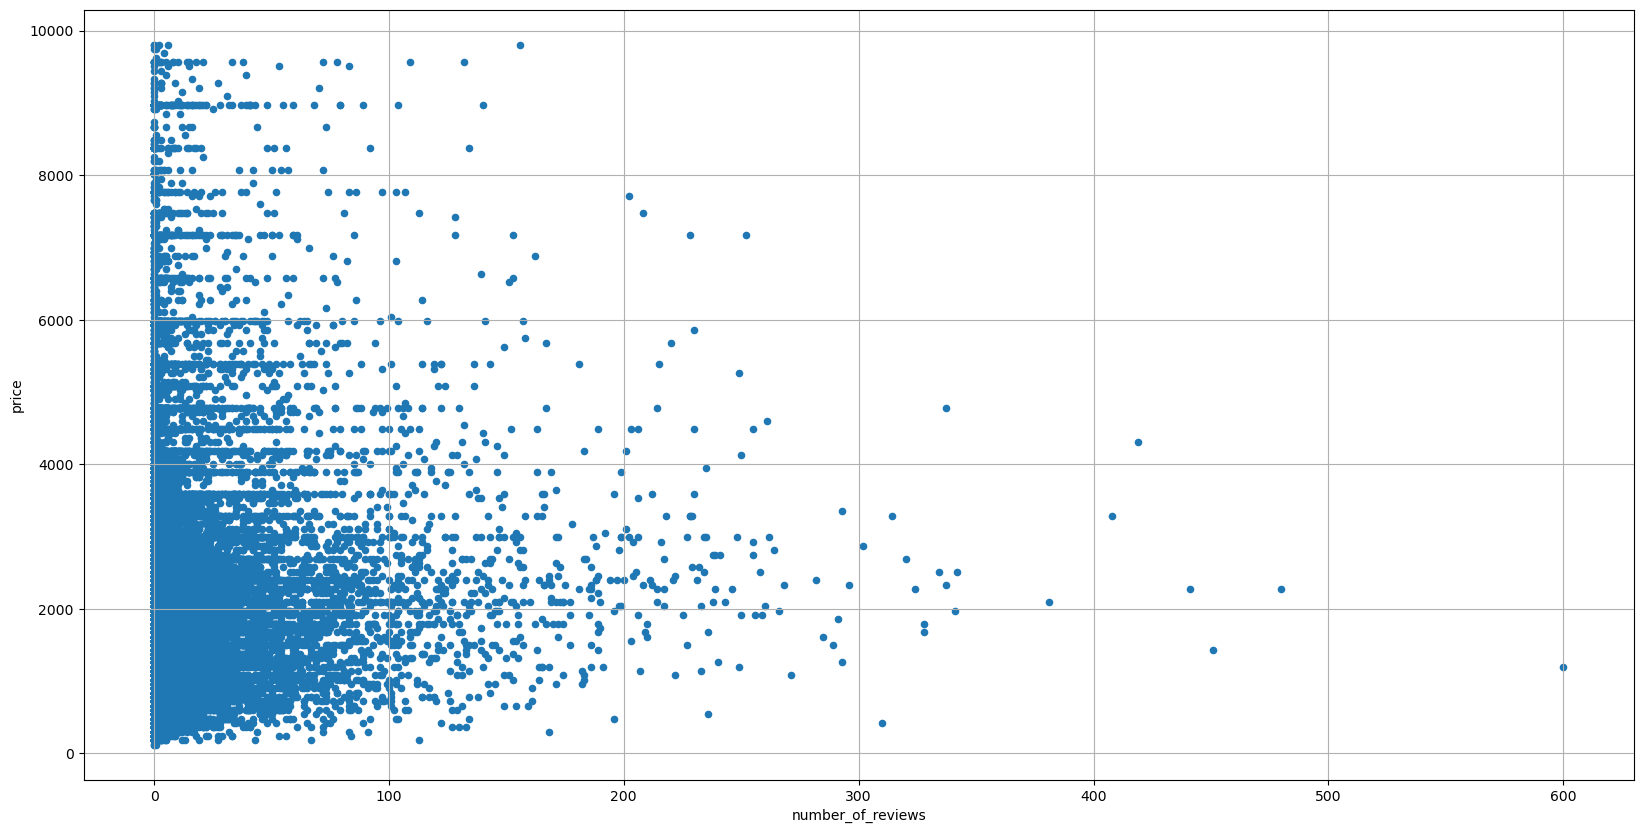

In [202]:
#Grafiquemos nuestro resultado
import matplotlib.pyplot as plt

baseReducida.plot(kind='scatter',x='number_of_reviews',y='price',grid=True,figsize=(20,10))

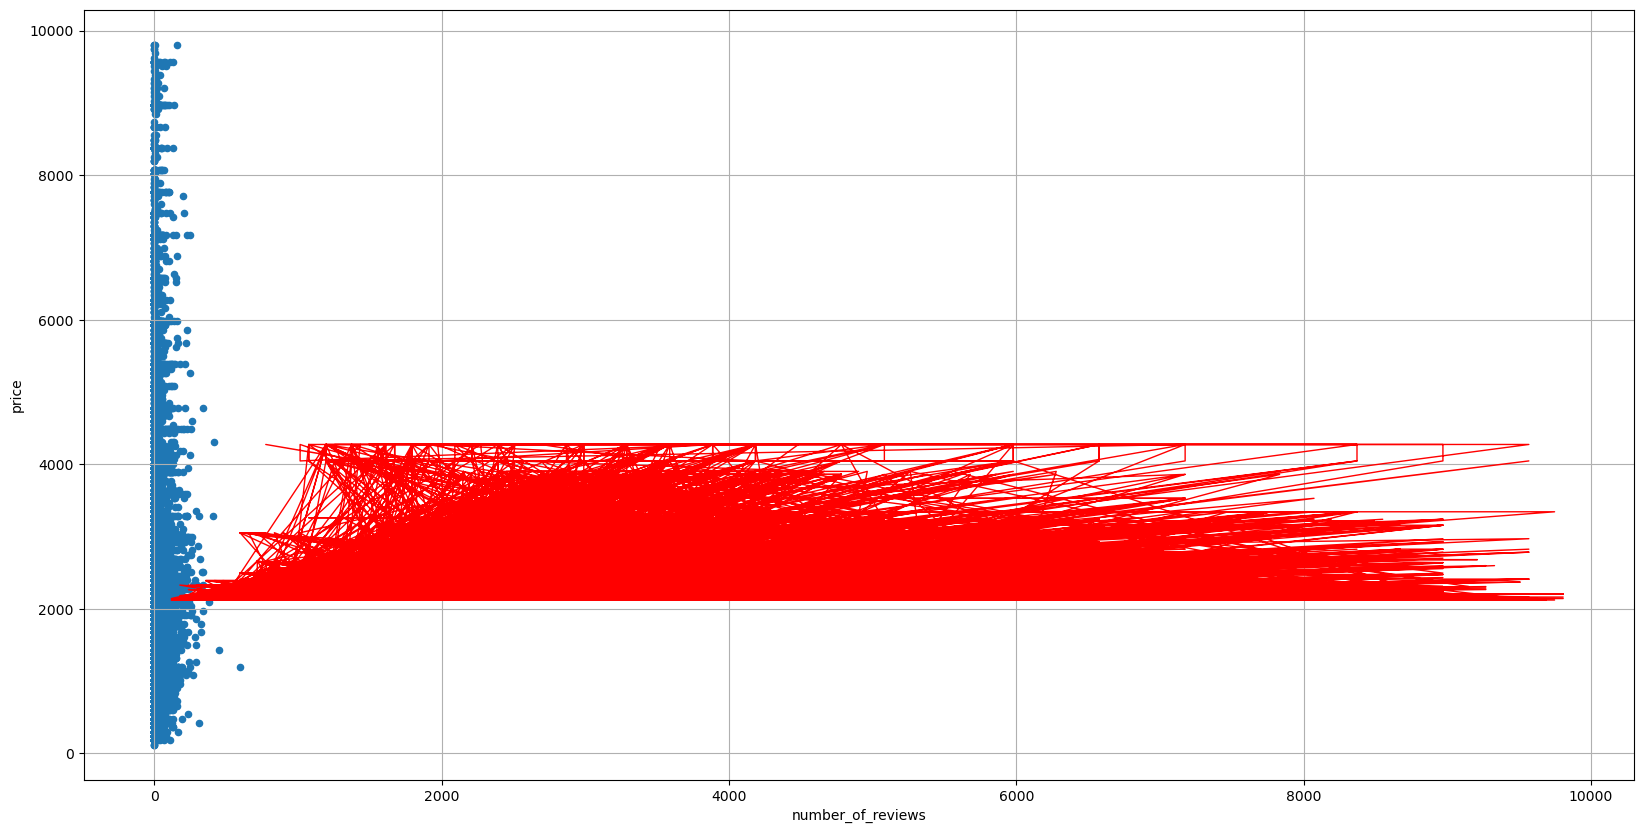

In [213]:
# Graficar los datos de dispersión
baseReducida.plot(kind='scatter', x='number_of_reviews', y='price', grid=True, figsize=(20, 10))

# Graficar la línea de regresión
plt.plot(baseReducida['price'], baseReducida['Precio Prediccion'], c='red', linewidth=1)

# Configurar los ejes y agregar etiquetas
plt.xlabel('number_of_reviews')
plt.ylabel('price')

# Mostrar el gráfico
plt.show()

## Entrenar y evaluar el modelo de predicción de Barrio:

In [204]:
#d = dict( enumerate(baseReducida.room_type.cat.categories) )
d = {'Entire home/apt': 0,  'Hotel room':1,  'Private room' : 2,  'Shared room' : 3}

print (d)
baseReducida["id_room_type"] = baseReducida["room_type"].map( d )
print(baseReducida["id_room_type"] )

{'Entire home/apt': 0, 'Hotel room': 1, 'Private room': 2, 'Shared room': 3}
0        0
1        0
2        2
3        2
4        2
        ..
22872    0
22873    2
22874    2
22875    0
22876    0
Name: id_room_type, Length: 22256, dtype: category
Categories (4, int64): [0, 1, 2, 3]


In [214]:
baseReducida["rpm_sin_nan"] = baseReducida["reviews_per_month"].fillna( float(0))
x = baseReducida[[ "price" , "id_room_type",  "rpm_sin_nan", "minimum_nights" ] ]
y = baseReducida[ "neighbourhood" ]


In [216]:
#Veamos nuestras variables para
x.shape

(22256, 4)

In [217]:
y.shape

(22256,)

In [218]:
#Veamos las clases que tiene.
y.unique()

['Palermo', 'Recoleta', 'Monserrat', 'Nuñez', 'Balvanera', ..., 'Villa Gral. Mitre', 'Villa Santa Rita', 'Villa Real', 'Villa Riachuelo', 'Villa Soldati']
Length: 48
Categories (48, object): ['Agronomia', 'Almagro', 'Balvanera', 'Barracas', ..., 'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati', 'Villa Urquiza']

In [220]:
#Dividimos el conjunto de datos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [221]:
# Crear una instancia del modelo KNN (KNeighborsClassifier)
clasificador = neighbors.KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento
clasificador.fit(x_train, y_train)

# Calcular la precisión del modelo utilizando los datos de prueba
accuracy = clasificador.score(x_test, y_test)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.20619946091644206


precisión del modelo de 0.20619946091644206, significa que el modelo KNN que has entrenado tiene un rendimiento bajo en la predicción de los datos de prueba.

In [222]:
# Realizar la predicción en los datos de prueba
y_pred = clasificador.predict(x_test)

# Imprimir el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

Reporte de clasificación:
                   precision    recall  f1-score   support

        Agronomia       0.00      0.00      0.00        11
          Almagro       0.06      0.14      0.08       188
        Balvanera       0.07      0.11      0.08       228
         Barracas       0.00      0.00      0.00        29
         Belgrano       0.06      0.09      0.07       200
             Boca       0.00      0.00      0.00        29
            Boedo       0.04      0.05      0.04        19
        Caballito       0.04      0.07      0.05        76
        Chacarita       0.01      0.01      0.01        88
          Coghlan       0.00      0.00      0.00        14
       Colegiales       0.03      0.02      0.02        95
     Constitucion       0.06      0.03      0.04        67
           Flores       0.00      0.00      0.00        19
         Floresta       0.00      0.00      0.00         7
          Liniers       0.00      0.00      0.00         1
        Mataderos       0.00 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


En el reporte de clasificación que proporcionaste, se puede observar lo siguiente:

La precisión para la mayoría de las clases de barrio es baja, lo que indica que el modelo tiene dificultades para clasificar correctamente las observaciones en esas clases.
El recall también es bajo para la mayoría de las clases, lo que indica que el modelo tiene dificultades para identificar correctamente las observaciones positivas en esas clases.
La puntuación F1, que combina precisión y recall, también es baja para la mayoría de las clases.
La precisión, recall y puntuación F1 promedio ponderadas y sin ponderar también son bajas, lo que indica un rendimiento general deficiente del modelo.

In [223]:
x.head(5)

price id_room_type  rpm_sin_nan  minimum_nights
0   2033            0         0.15              20
1   3588            0         0.28               2
2   1435            2         0.17               1
3   2691            2         0.09               1
4   2691            2         0.00               1

In [224]:
#Ahora clasifiquemos nuevas muestras.
#Generamos un nuevo dato falso

muestra_base = np.array([2000,2,0.15,15])

#Sacamos la longitud
len(muestra_base)

4

In [225]:
muestra_base = muestra_base.reshape(1,-1)
muestra_base

array([[2.0e+03, 2.0e+00, 1.5e-01, 1.5e+01]])

In [226]:
prediccion = clasificador.predict(muestra_base)
prediccion

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Belgrano'], dtype=object)

In [227]:
import numpy as np

# Generar nuevos datos aleatorios con 4 características
aleatorios = np.random.randint(1, 4, size=(1, 4))

# Hacer la predicción con esos nuevos datos
prediccion2 = clasificador.predict(aleatorios)

# Mostrar el resultado de la predicción
prediccion2

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Almagro'], dtype=object)

### Clasificación - Árboles de decisión.

In [250]:
baseReducida["rpm_sin_nan"] = baseReducida["reviews_per_month"].fillna( float(0))
x = baseReducida[[ "price" , "id_room_type",  "rpm_sin_nan", "minimum_nights","neighbourhood" ] ]

x.head(5)

price id_room_type  rpm_sin_nan  minimum_nights neighbourhood
0   2033            0         0.15              20       Palermo
1   3588            0         0.28               2       Palermo
2   1435            2         0.17               1      Recoleta
3   2691            2         0.09               1       Palermo
4   2691            2         0.00               1       Palermo

In [253]:
#Queremos predecir de acuerdo a las características que tiene.
#Queremos predecir de acuerdo a las características que tiene.
x ['neighbourhood'].unique()

['Palermo', 'Recoleta', 'Monserrat', 'Nuñez', 'Balvanera', ..., 'Villa Gral. Mitre', 'Villa Santa Rita', 'Villa Real', 'Villa Riachuelo', 'Villa Soldati']
Length: 48
Categories (48, object): ['Agronomia', 'Almagro', 'Balvanera', 'Barracas', ..., 'Villa Riachuelo', 'Villa Santa Rita', 'Villa Soldati', 'Villa Urquiza']

In [254]:
#Las variables predictoras serán las primeras 4 que utilizaremos.
predictoras = x[x.columns[0:3]]

In [255]:
#Luego vamos a buscar nuestra variable objetivo.
objetivo = x[x.columns[-1]]

In [248]:
#Veamos nuestra columna objetivo.
objetivo

0        20
1         2
2         1
3         1
4         1
         ..
22872     1
22873     1
22874     1
22875     3
22876     2
Name: minimum_nights, Length: 22256, dtype: int64

In [256]:
#Dividmos nuestro set en entrenamiento y test.
x['entrenamiento'] = np.random.uniform(0,1,len(x))<=0.75

#Efectivamente cuando lo compruebo, así sucede.
#Recordemos que en programación TRUE = 1
x['entrenamiento'].sum()/x.shape[0]

C:\Users\pim\AppData\Local\Temp\ipykernel_10200\3612566102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['entrenamiento'] = np.random.uniform(0,1,len(x))<=0.75


0.747618619698059

In [258]:
x

price id_room_type  rpm_sin_nan  minimum_nights      neighbourhood  \
0       2033            0         0.15              20            Palermo   
1       3588            0         0.28               2            Palermo   
2       1435            2         0.17               1           Recoleta   
3       2691            2         0.09               1            Palermo   
4       2691            2         0.00               1            Palermo   
...      ...          ...          ...             ...                ...   
22872   1495            0         0.00               1   Parque Patricios   
22873   1196            2         0.00               1      Villa Urquiza   
22874   2691            2         0.00               1            Palermo   
22875   1375            0         0.00               3            Palermo   
22876   1196            0         0.00               2  Villa Gral. Mitre   

       entrenamiento  
0               True  
1               True  
2              False  
3              False  
4               True  
...              ...  
22872           True  
22873           True  
22874          False  
22875           True  
22876          False  

[22256 rows x 6 columns]

In [257]:
#Ahora separemos ambos conjuntos
entrenamiento,prueba = x[x['entrenamiento']==True],x[x['entrenamiento']==False]

In [260]:
#Ahora generemos nuestro arbol
from sklearn.tree import DecisionTreeClassifier

#Generamos nuestro objeto árbol
#Establecemos el criterio de "Entropía" para dividir las ramas y el mínimo de muestras que debe tener cada nodo
arbol = DecisionTreeClassifier(criterion='entropy',min_samples_split=10,random_state=99)

In [261]:
#Entrenamos nuestro modelo con los datos de entrenamiento que generamos anteriormente
clf = arbol.fit(entrenamiento[predictoras.columns],entrenamiento['neighbourhood'])

In [262]:
#Probarmos para ver las predicciones
predicciones = arbol.predict(prueba[predictoras.columns])

In [263]:
#Finalmente vemos cómo perfomó nuestro modelo con los datos predecidos.
pd.crosstab(prueba['neighbourhood'],predicciones,rownames=['Actual'],colnames=['Predicciones'])

Predicciones       Agronomia  Almagro  Balvanera  Barracas  Belgrano  Boca  \
Actual                                                                       
Agronomia                  0        1          4         2         0     0   
Almagro                    0       26         22         1         5     1   
Balvanera                  1       29         26         1        13     0   
Barracas                   0        3          5         0         0     0   
Belgrano                   1       14         11         2        10     0   
Boca                       0        3          0         0         2     0   
Boedo                      0        4          2         0         1     0   
Caballito                  0       15          5         0        10     1   
Chacarita                  0        6         12         1         7     1   
Coghlan                    0        1          4         0         0     0   
Colegiales                 0       13          7         0         4     1   
Constitucion               1        8          4         0         4     0   
Flores                     0        3          2         0         2     0   
Floresta                   1        3          1         0         0     0   
Liniers                    0        2          1         0         1     0   
Mataderos                  0        1          2         0         0     0   
Monserrat                  0       18         13         0        17     1   
Monte Castro               0        0          0         0         0     0   
Nueva Pompeya              0        0          1         0         0     0   
Nuñez                      0        6          4         1         3     0   
Palermo                    0       76         91         9        56     1   
Parque Avellaneda          0        1          0         0         0     0   
Parque Chacabuco           0        3          1         0         0     1   
Parque Chas                0        1          2         0         1     0   
Parque Patricios           0        2          2         1         1     0   
Paternal                   0        0          1         0         1     0   
Puerto Madero              0        0          1         0         0     0   
Recoleta                   0       45         46        10        27     2   
Retiro                     0       10         11         0        13     1   
Saavedra                   0        4          5         0         1     0   
San Cristobal              0        6          2         0         2     0   
San Nicolas                0       24         16         2        13     1   
San Telmo                  0        7         11         1         8     0   
Velez Sarsfield            0        2          0         0         0     0   
Versalles                  0        0          0         0         0     0   
Villa Crespo               0       19         18         1        14     1   
Villa Del Parque           0        1          2         0         2     0   
Villa Devoto               0        5          1         1         0     0   
Villa Gral. Mitre          0        0          3         0         0     0   
Villa Lugano               0        0          0         0         0     0   
Villa Luro                 0        0          2         0         0     0   
Villa Ortuzar              0        2          1         0         1     0   
Villa Pueyrredon           0        1          0         0         1     0   
Villa Real                 0        1          0         0         0     0   
Villa Santa Rita           0        1          1         0         0     0   
Villa Soldati              0        0          1         0         0     0   
Villa Urquiza              0        6          4         0         3     0   

Predicciones       Boedo  Caballito  Chacarita  Colegiales  ...  Retiro  \
Actual                                                      ...           
Agronomia              0   

# PARTE III. Modelado no supervisado

### a. Implementar el modelo de acuerdo a las variables de agrupamiento o predictoras que consideren mejor. b. Evaluar cuál es el mejor número de clusters para agrupar el conjunto de datos.

In [266]:
#Para el clustering, vamos a utilizar las variables continuas.
#Hacemos una rápida exploración de los datos.
dataCluster = baseReducida[baseReducida.columns[:6]].fillna(0)
dataCluster

price  minimum_nights  number_of_reviews  reviews_per_month  \
0       2033              20                 14               0.15   
1       3588               2                 25               0.28   
2       1435               1                 20               0.17   
3       2691               1                  1               0.09   
4       2691               1                  0               0.00   
...      ...             ...                ...                ...   
22872   1495               1                  0               0.00   
22873   1196               1                  0               0.00   
22874   2691               1                  0               0.00   
22875   1375               3                  0               0.00   
22876   1196               2                  0               0.00   

       calculated_host_listings_count  availability_365  
0                                   1               363  
1                                   1               281  
2                                   1               365  
3                                   7               360  
4                                   7               360  
...                               ...               ...  
22872                               1               178  
22873                               1               143  
22874                               2                 5  
22875                               1               152  
22876                               1               333  

[22256 rows x 6 columns]

In [267]:
dataCluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22256 entries, 0 to 22876
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           22256 non-null  int64  
 1   minimum_nights                  22256 non-null  int64  
 2   number_of_reviews               22256 non-null  int64  
 3   reviews_per_month               22256 non-null  float64
 4   calculated_host_listings_count  22256 non-null  int64  
 5   availability_365                22256 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.2 MB


<Figure size 1500x800 with 0 Axes>

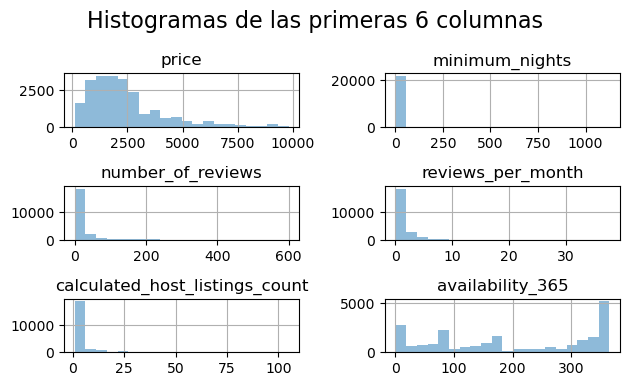

In [268]:
import matplotlib.pyplot as plt

# Aumentar el tamaño de la figura con valores personalizados (ancho x alto)
plt.figure(figsize=(15, 8)) # Modificar el tamaño aquí según tus preferencias

# Ajustar el número de bins y agregar transparencia
dataCluster[dataCluster.columns[:6]].hist(bins=20, alpha=0.5, layout=(4, 2)) # Organiza en 4 filas y 2 columnas

# Agregar títulos y etiquetas
plt.suptitle('Histogramas de las primeras 6 columnas', fontsize=16)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

plt.tight_layout() # Ajustar los subplots para evitar superposiciones

plt.show()


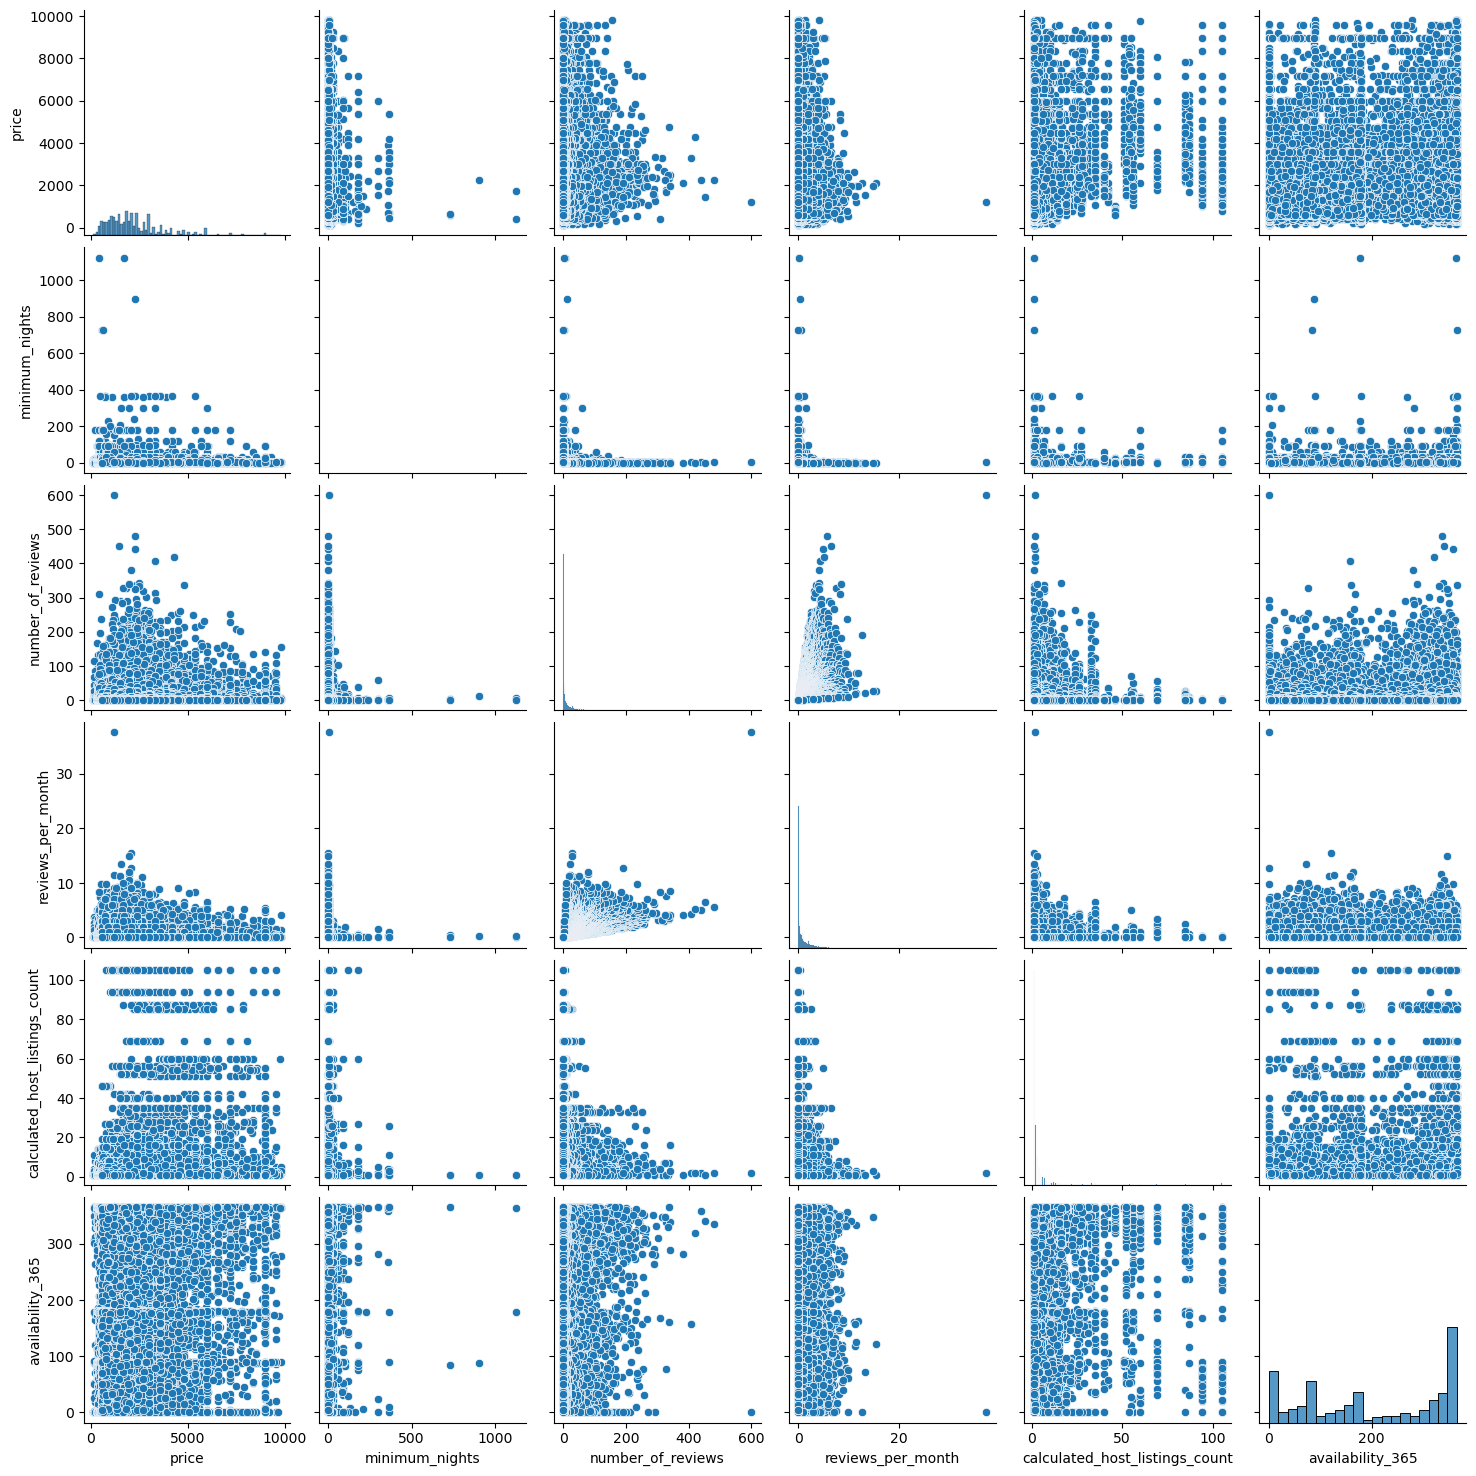

In [269]:
#Cruzamos todas las variables para ver su covarianza
sns.pairplot(dataCluster)

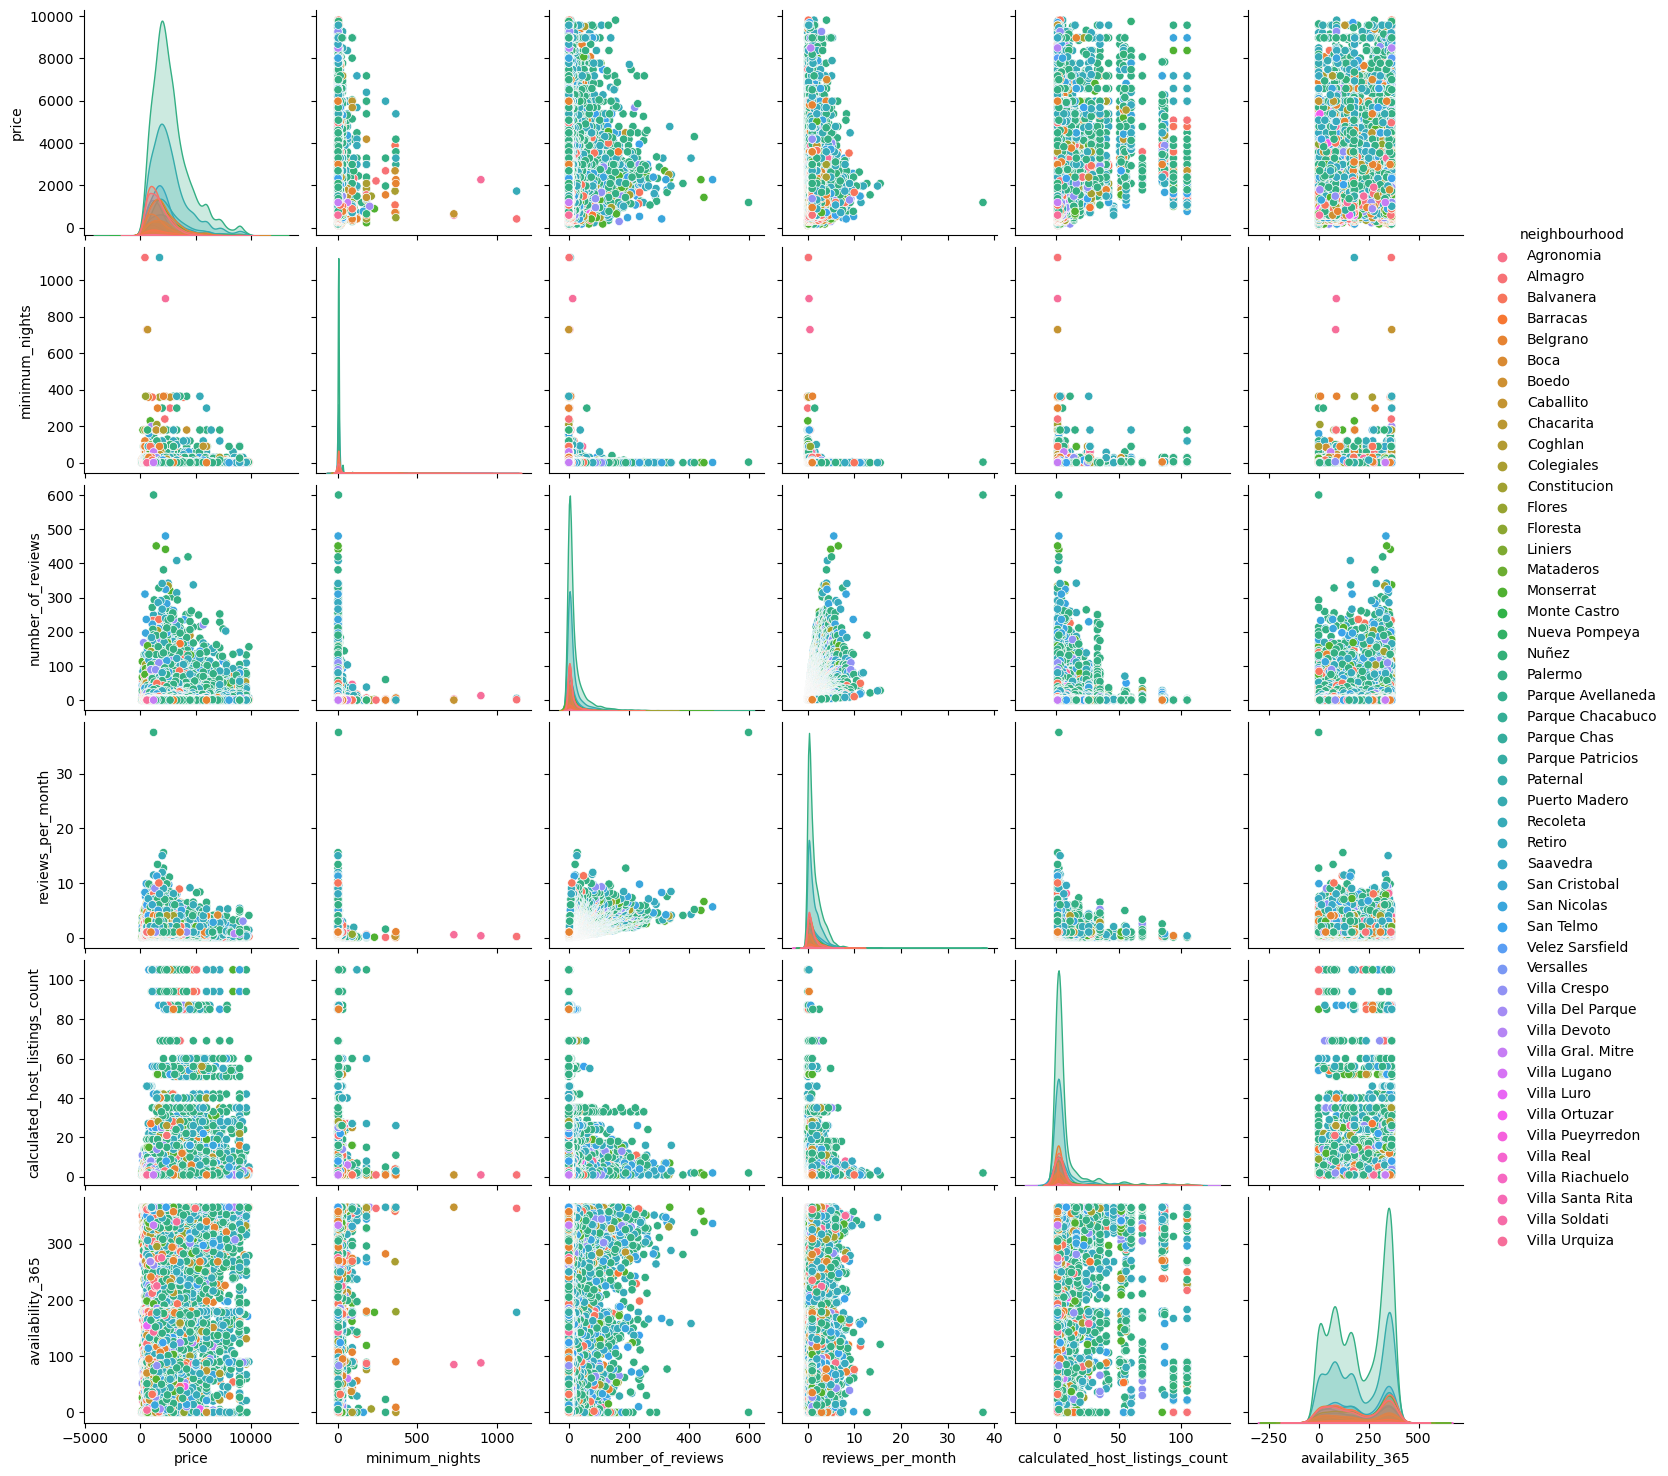

In [270]:
#Cruzamos todas las variables para ver su covarianza. Agregamos una variable categórica para ver más variación
sns.pairplot(baseReducida,hue = 'neighbourhood')

In [271]:
#Para el clustering, vamos a utilizar las variables continuas.
X = dataCluster[baseReducida.columns[:6]]


In [272]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,
                init='k-means++',
                max_iter = 100,
                n_init=10,
                random_state=0)

In [ ]:
#Ahora ajustamos nuestro modelo
kmeans.fit(X)

In [ ]:
kmeans.inertia_

In [ ]:
kmeans = KMeans(n_clusters=3,
                init='k-means++',
                max_iter = 100,
                n_init=10,
                random_state=0)
kmeans.fit(x)

print( "Inercia del modelo: {0}".format( round( kmeans.inertia_ , 6 )))

In [ ]:
kmeans = KMeans(n_clusters=10,
                init='k-means++',
                max_iter = 100,
                n_init=10,
                random_state=0)
kmeans.fit(x)

print( "Inercia del modelo: {0}".format( round( kmeans.inertia_ , 6 )))

El problema de seguir bajando, es que podemos generar un sobreajuste y además agrupamientos innecesarios. En este sentido, podemos evaluar mediante el método de Elbow para evitar esto y ver el número óptimo de clusters.

### b.	Evaluar cuál es el mejor número de clusters para agrupar el conjunto de datos.

In [ ]:
#Para eso, necesitamos generar n valores para visualizar
def kmeans(dataCluster,n_clusters):

  valores = []

  for n in range(1,n_clusters):
    kmeans = KMeans(n_clusters=n,
                    init='k-means++',
                    max_iter=300,
                    n_init=10,
                    random_state=0)

    kmeans.fit(dataCluster)

    valores.append(kmeans.inertia_)

  plt.figure(figsize=(20,10))
  plt.plot(list(range(1,n_clusters)),valores,'-bD',  c='blue', mfc='red', mec='k')
  plt.title('Evaluación mediante método de Elbow')
  plt.xlabel('Número de clusters')
  plt.ylabel('Inercia - WCSS')
  plt.grid(True)
  plt.show()

kmeans(dataCluster,10)

In [ ]:
#Buscamos ahora las predicciones
#Busquemos generar una inercia más baja.
#Creamos nuestra instancia del algoritmo con los parámetros
kmeans = KMeans(n_clusters=4,
                init='k-means++',
                max_iter = 100,
                n_init=10,
                random_state=0)

#Ajustamos el modelo
kmeans.fit(X)

#Generamos las predicciones
y = kmeans.fit_predict(X)

#Vemos las predicciones
y

In [ ]:
#Lo ponemos en el dataframe
dataCluster['cluster'] = y

In [ ]:
import plotly.express as px

fig = px.scatter(data, x="price", y="number_of_reviews", color="cluster",
                 size='number_of_reviews')
fig.show()